$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge simulate$ $\hspace{0.1cm}$ $\Huge CIB$ $\hspace{0.1cm}$ $\Huge maps$ $\Huge :$ 

# Modules : 

In [2]:
%matplotlib inline
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
from astropy import constants as cst
from astropy.cosmology import FlatLambdaCDM
import pysm as pysm
import ccatp_sky_model as sky

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.7255)
T_CMB = cosmo.Tcmb0.si.value
k_B = cst.k_B.value
h = cst.h.value
c = cst.c.value

In [6]:
data_path = "/vol/arc3/data1/sz/CCATp_sky_model/templates/"

# Function : 

In [10]:
def simulate_cib(freq, nside_out = 4096, lmax = None, beam_FWHM = None, template = 'WebSky', unit = 'cmb'):

    '''Computes an all-sky CIB map at a given frequency and nside based on . 
    Parameters
    ----------
    freq: float or float array
        Frequency of the output map in Hz.
    nside_out: float, optional
        Healpix nside parameter of the output map. Must be a valid value for nside.
        Default: 4096
    lmax: float, optional
        Maximum value of the multipolemoment at which the atmospheric power spectrum
        wil be computed. Default: 3*nside_out-1  	
    beam_FWHM: bool, optional
        If set, the output will be convolved with a gaussian. The FWHM of the Gaussian
        in units of arcmin is given by the provided value. Default: None
    template: bool, optional
        Determines the all-sky foregrounds templates to be used to build the sky model.
        If 'Sehgal' is chosen, simulations by Sehgal et al. (2010) are used.
        If 'SO' is chosen, the Simons Observatory sky model provided by Colin Hill and 
        based on the simulations by Sehgal et al. (2010) is used. If 'WebSky' is chosen,
        the used templates will be based on the WebSky Extragalactic CMB Mocks provided 
        by CITA. If 'SO_reproduced' is chosen, the SO sky model is reproduced directly 
        from the Sehgal et al. (2010) data. Default: 'WebSky'
    unit: bool, optional
        Determines the units of the output map. The available units are 'mjy' --> MJy/sr
        (specific intensity), 'cmb' --> K_CMB (thermodynamic temperature), and 
        'rj' --> K_RJ (brightness temperature). Default: 'cmb'.
    Returns
    -------
    cib: float array
        Healpix all-sky map of the CIB mission that the specified frequency.
    '''

    if lmax is None:
        lmax = int(3*nside_out-1)

    #Load all-sky parameter value maps
    if template != 'SO' and template != 'WebSky' and template != 'Sehgal' and template != 'SO_reproduced':
        print('Waring: Unknown template requested! Output will be based on WebSky sky model')
        template = 'WebSky'

    if template == 'SO':
        A = hp.fitsfunc.read_map(data_path + 'CIB/SO_CIB_A_DUST_4096.fits', dtype = np.float32)    
        T = hp.fitsfunc.read_map(data_path + 'CIB/SO_CIB_T_DUST_4096.fits', dtype = np.float32)
        beta = hp.fitsfunc.read_map(data_path + 'CIB/SO_CIB_beta_DUST_4096.fits', dtype = np.float32)
        f_0 = 353e9

    elif (template == 'Sehgal') or (template == 'SO_reproduced'):
        A = hp.fitsfunc.read_map(data_path + 'CIB/Sehgal_CIB_A_DUST_8192.fits', dtype = np.float32)
        T = hp.fitsfunc.read_map(data_path + 'CIB/Sehgal_CIB_T_DUST_8192.fits', dtype = np.float32)
        beta = hp.fitsfunc.read_map(data_path + 'CIB/Sehgal_CIB_beta_DUST_8192.fits', dtype = np.float32)
        f_0 = 350e9

        if template == 'SO_reproduced':
            A *= 0.75
	
    elif template == 'WebSky':
        A = hp.fitsfunc.read_map(data_path + 'CIB/CITA_CIB_A_DUST_4096.fits', dtype = np.float32)    
        T = hp.fitsfunc.read_map(data_path + 'CIB/CITA_CIB_T_DUST_4096.fits', dtype = np.float32)
        beta = hp.fitsfunc.read_map(data_path + 'CIB/CITA_CIB_beta_DUST_4096.fits', dtype = np.float32)
        f_0 = 353e9

    #Compute CIB brightness at given frequency
    cib = A * (freq/f_0)**(3.+beta) * (np.exp(h*f_0/k_B/T)-1) / (np.exp(h*freq/k_B/T)-1)
    del A, T, beta
    
    #Re-bin map if necessary
    if hp.get_nside(cib) != nside_out:
        cib = hp.pixelfunc.ud_grade(cib, nside_out = nside_out)

    #Smooth map if necessary
    if beam_FWHM is not None:
        print('begin smoothing')
        cib = hp.sphtfunc.smoothing(cib, iter = 0, lmax = lmax, fwhm = beam_FWHM/60*np.pi/180)

    #Convert units if necessary
    if unit == 'mjy':
        None
    elif unit == 'cmb':
        cib = sky.convert_units(freq, cib, mjy2cmb=True)
    elif unit == 'rj':
        cib = sky.convert_units(freq, cib, mjy2rj=True)
    else:
        cib = sky.convert_units(freq, cib, mjy2cmb=True)
        print('Waring: Unknown unit! Output will be in K_CMB')

    #Return output
    return(np.float32(cib))

# Launch : 

In [11]:
CIB_map = simulate_cib(freq=150e9, nside_out = 1024, lmax = None, beam_FWHM = None, template = 'WebSky',
                       unit = 'cmb')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


masked_array(
  data=[[-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        ...,
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf],
        [-inf, -inf, -inf, ..., -inf, -inf, -inf]],
  mask=False,
  fill_value=-1.6375e+30)

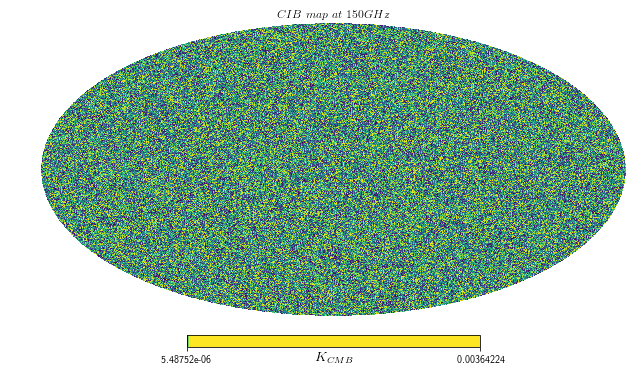

In [13]:
hp.mollview(map=CIB_map, coord=None, nest=False, title='$CIB$ $map$ $at$ $150GHz$',
            unit='$K_{CMB}$', norm='hist', xsize=2000,return_projected_map=True)